In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\mryad\\Downloads\\vgchartz-2024@TKA.csv"
df = pd.read_csv(file_path)

# Handling missing values
# Filling missing numeric values with 0
df['critic_score'].fillna(0, inplace=True)
df['total_sales'].fillna(0, inplace=True)
df['na_sales'].fillna(0, inplace=True)
df['jp_sales'].fillna(0, inplace=True)
df['pal_sales'].fillna(0, inplace=True)
df['other_sales'].fillna(0, inplace=True)

# Dropping rows with missing developer information
df.dropna(subset=['developer'], inplace=True)

# Converting date columns to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

# Filling missing date values with a placeholder date (e.g., '1970-01-01')
df['release_date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
df['last_update'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

# Verifying changes
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 63999 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           63999 non-null  object        
 1   title         63999 non-null  object        
 2   console       63999 non-null  object        
 3   genre         63999 non-null  object        
 4   publisher     63999 non-null  object        
 5   developer     63999 non-null  object        
 6   critic_score  63999 non-null  float64       
 7   total_sales   63999 non-null  float64       
 8   na_sales      63999 non-null  float64       
 9   jp_sales      63999 non-null  float64       
 10  pal_sales     63999 non-null  float64       
 11  other_sales   63999 non-null  float64       
 12  release_date  63999 non-null  datetime64[ns]
 13  last_update   63999 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(6)
memory usage: 7.3+ MB


C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\1130373345.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critic_score'].fillna(0, inplace=True)
C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\1130373345.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,1970-01-01
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-03-01
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,1970-01-01
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.0,15.86,9.06,0.06,5.33,1.42,2013-09-17,1970-01-01
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,1970-01-01


In [7]:
# Handling missing values
df['critic_score'].fillna(0, inplace=True)
df['total_sales'].fillna(0, inplace=True)
df['na_sales'].fillna(0, inplace=True)
df['jp_sales'].fillna(0, inplace=True)
df['pal_sales'].fillna(0, inplace=True)
df['other_sales'].fillna(0, inplace=True)
df.dropna(subset=['developer'], inplace=True)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')
df['release_date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
df['last_update'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

# Summary statistics
print(df.describe())
print(df['genre'].value_counts())
print(df['console'].value_counts())

       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  63999.000000  63999.000000  63999.000000  63999.000000  63999.000000   
mean       0.753420      0.103215      0.052271      0.010749      0.029951   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.020000      0.000000      0.000000      0.000000   
max       10.000000     20.320000      9.760000      2.130000      9.850000   
std        2.256979      0.467059      0.243811      0.063075      0.185665   

        other_sales                   release_date  \
count  63999.000000                          63999   
mean       0.010174  2002-10-23 19:03:24.021937920   
min        0.000000            1970-01-01 00:00:00   
25%        0.000000            1996-12-31 00:00:00   
50%        0.00000

C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\1171798951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critic_score'].fillna(0, inplace=True)
C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\1171798951.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

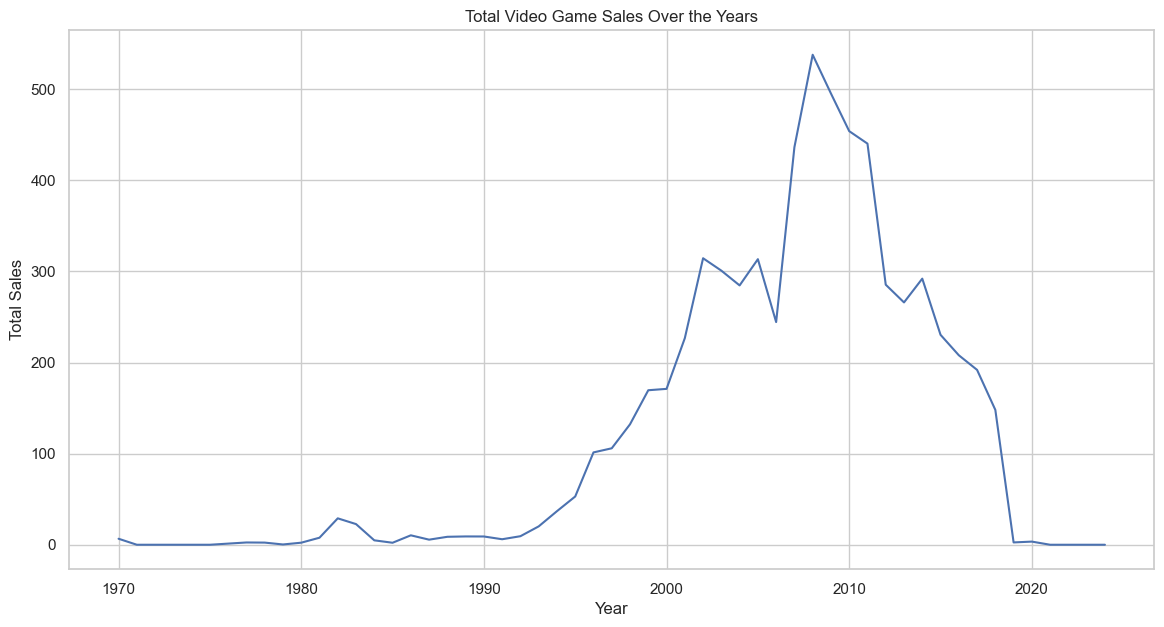

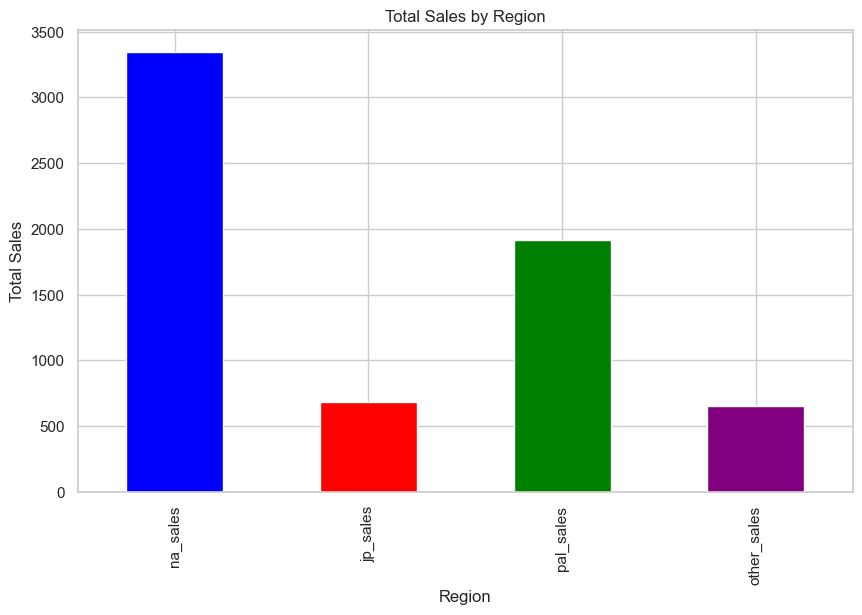

In [14]:
# Set plot style
sns.set(style="whitegrid")

# 1. Trends in video game sales over the years
plt.figure(figsize=(14, 7))
df.groupby(df['release_date'].dt.year)['total_sales'].sum().plot(kind='line')
plt.title('Total Video Game Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

# Sales across different regions
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
df[regions].sum().plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green', 'purple'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()



C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\957519089.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')


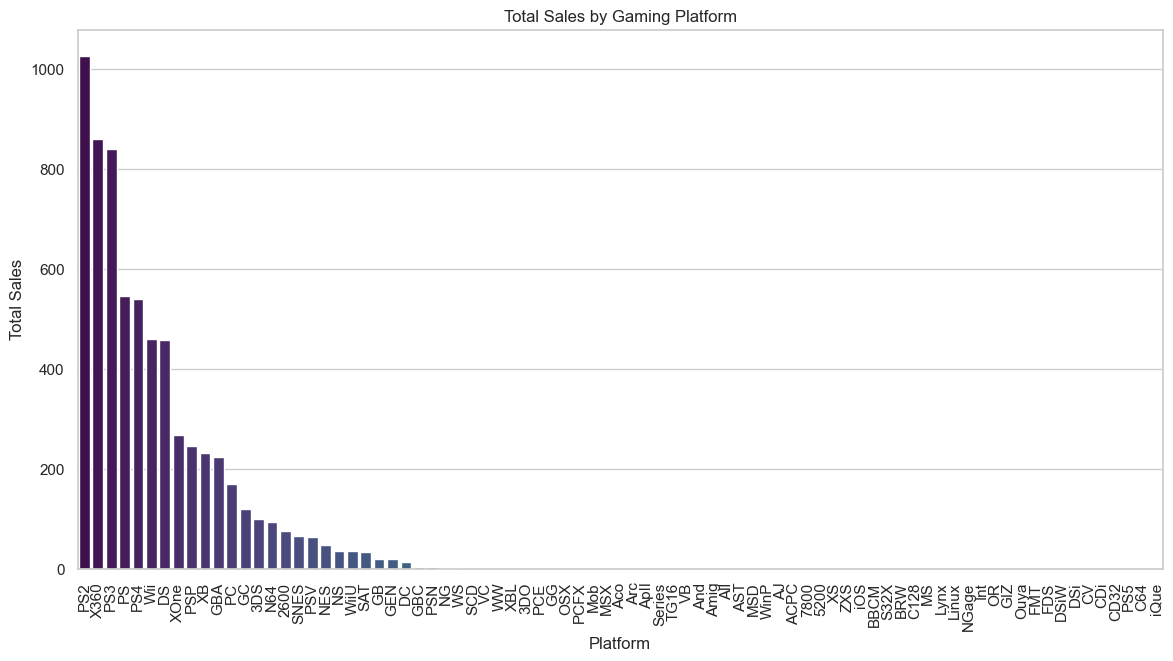

In [15]:
# 2. Performance of different gaming platforms
plt.figure(figsize=(14, 7))
platform_sales = df.groupby('console')['total_sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')
plt.title('Total Sales by Gaming Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()



C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\1795650855.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')


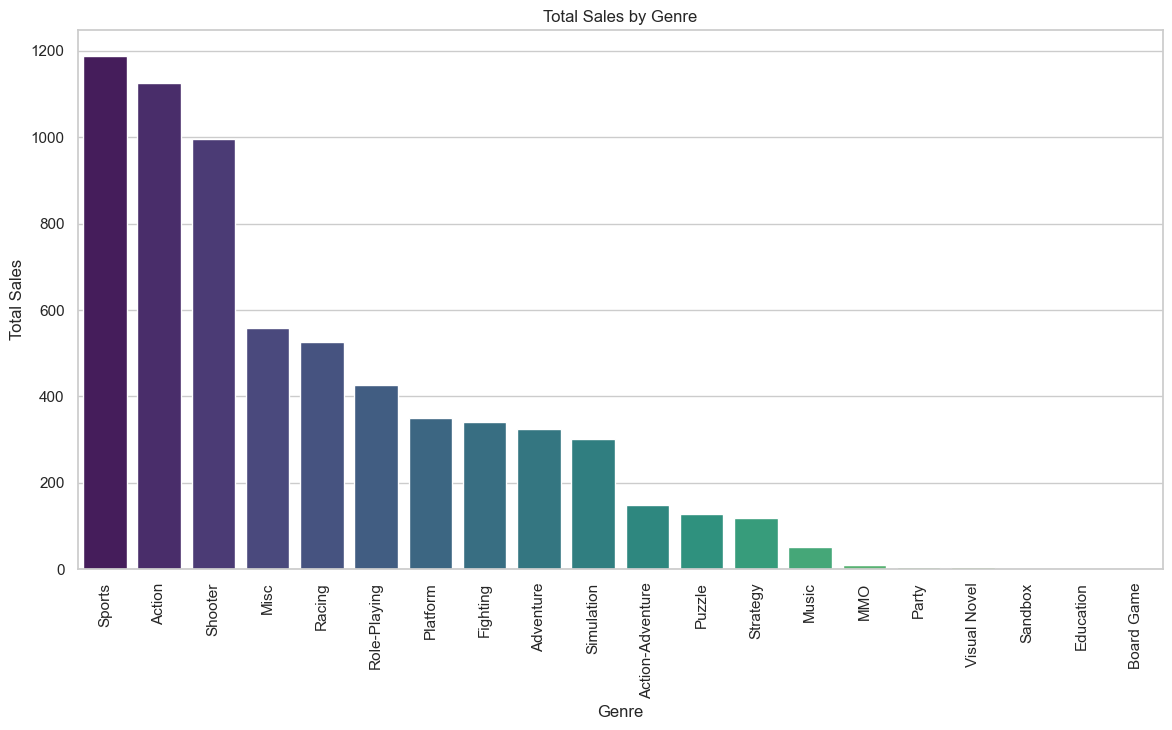

In [16]:
# 3. Performance of different genres
plt.figure(figsize=(14, 7))
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


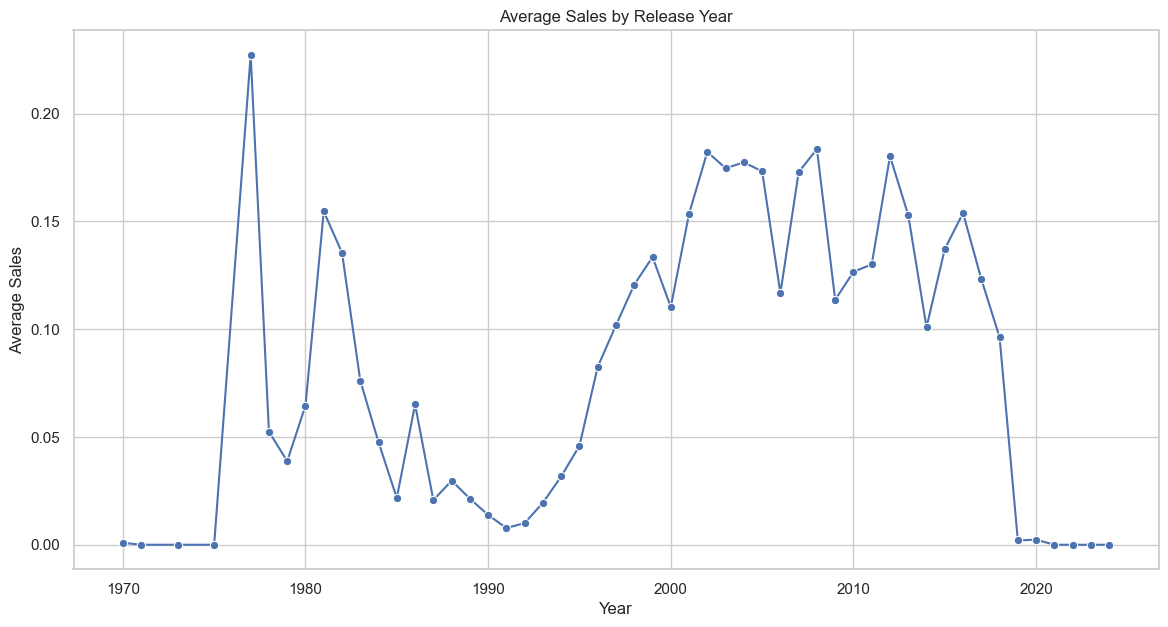

In [17]:
# 4. Impact of release year on sales
plt.figure(figsize=(14, 7))
release_year_sales = df.groupby(df['release_date'].dt.year)['total_sales'].mean()
sns.lineplot(x=release_year_sales.index, y=release_year_sales.values, marker='o')
plt.title('Average Sales by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.show()


C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\4254315791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.index, y=publisher_sales.values, palette='viridis')


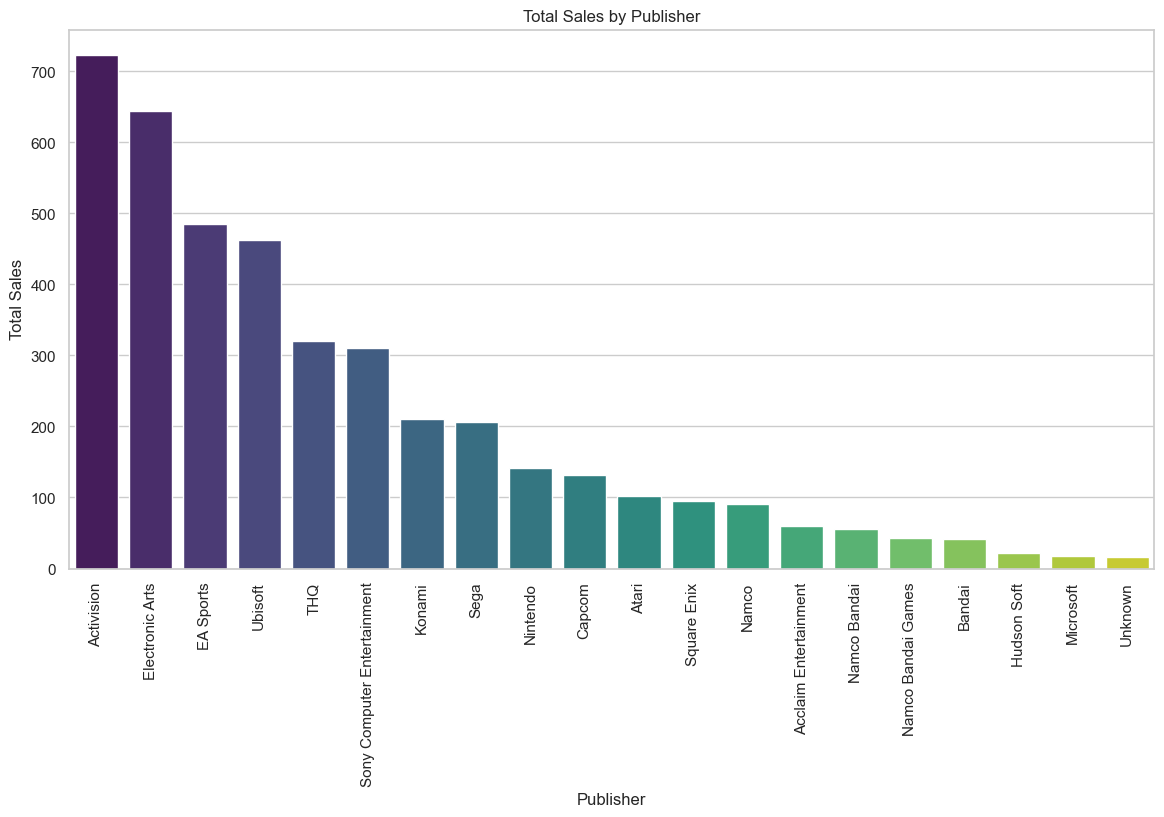

In [18]:
# 5. Impact of publishers on sales
plt.figure(figsize=(14, 7))
top_publishers = df['publisher'].value_counts().head(20).index
publisher_sales = df[df['publisher'].isin(top_publishers)].groupby('publisher')['total_sales'].sum().sort_values(ascending=False)
sns.barplot(x=publisher_sales.index, y=publisher_sales.values, palette='viridis')
plt.title('Total Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\4064609440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=developer_sales.index, y=developer_sales.values, palette='viridis')


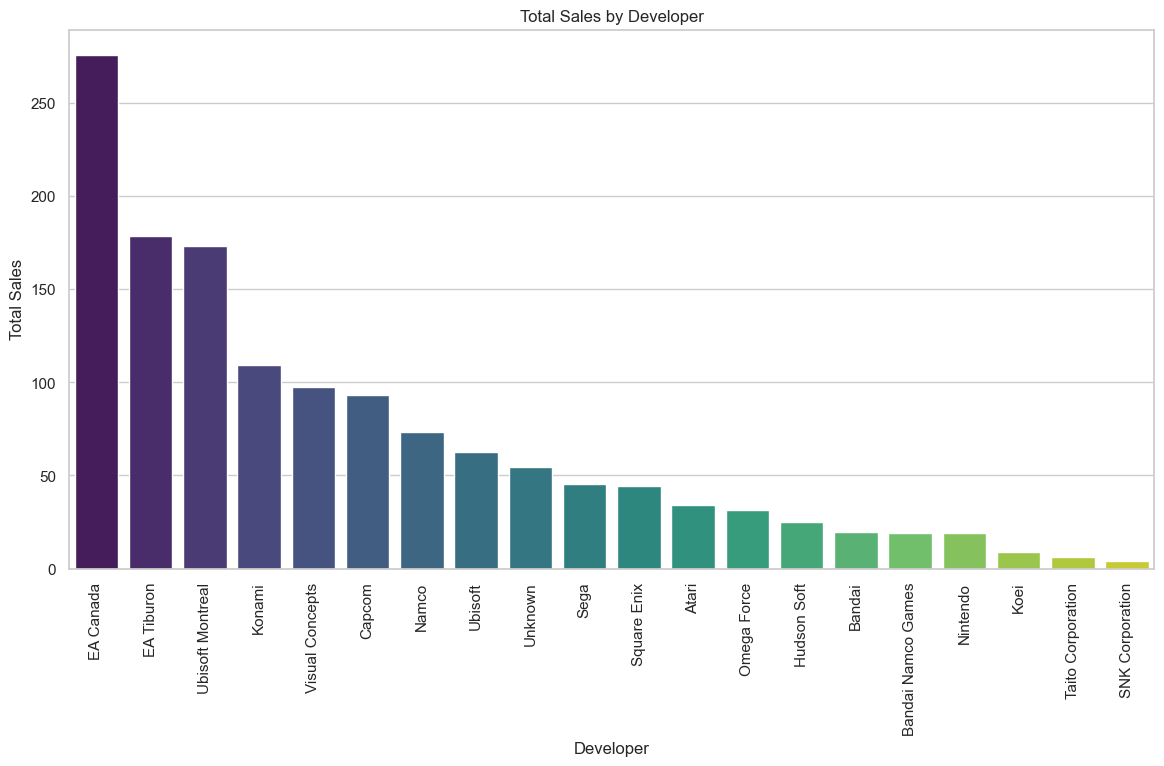

In [19]:
# 6. Impact of developers on sales
plt.figure(figsize=(14, 7))
top_developers = df['developer'].value_counts().head(20).index
developer_sales = df[df['developer'].isin(top_developers)].groupby('developer')['total_sales'].sum().sort_values(ascending=False)
sns.barplot(x=developer_sales.index, y=developer_sales.values, palette='viridis')
plt.title('Total Sales by Developer')
plt.xlabel('Developer')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

<Figure size 1400x700 with 0 Axes>

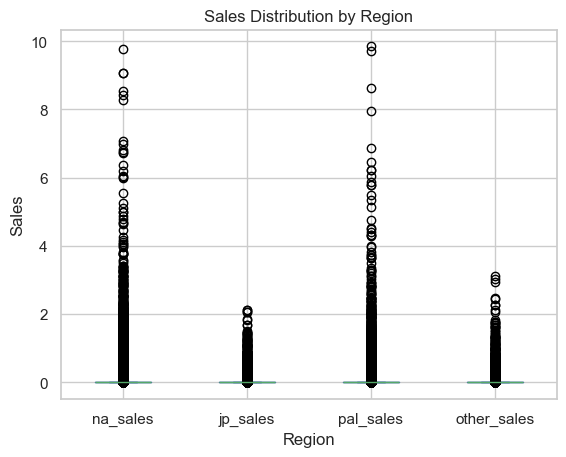

In [21]:
# Set plot style
sns.set(style="whitegrid")

# 1. Compare Sales Performance Across Different Regions
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Plot sales distribution by region
plt.figure(figsize=(14, 7))
df[regions].plot(kind='box')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


                            title  total_sales             genre console  \
0              Grand Theft Auto V        20.32            Action     PS3   
1              Grand Theft Auto V        19.39            Action     PS4   
2     Grand Theft Auto: Vice City        16.15            Action     PS2   
3              Grand Theft Auto V        15.86            Action    X360   
4       Call of Duty: Black Ops 3        15.09           Shooter     PS4   
5  Call of Duty: Modern Warfare 3        14.82           Shooter    X360   
6         Call of Duty: Black Ops        14.74           Shooter    X360   
7           Red Dead Redemption 2        13.94  Action-Adventure     PS4   
8      Call of Duty: Black Ops II        13.86           Shooter    X360   
9      Call of Duty: Black Ops II        13.80           Shooter     PS3   

  release_date       publisher       developer  
0   2013-09-17  Rockstar Games  Rockstar North  
1   2014-11-18  Rockstar Games  Rockstar North  
2   2002-10-28  

C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\1479106282.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='total_sales', data=top_games, palette='viridis')


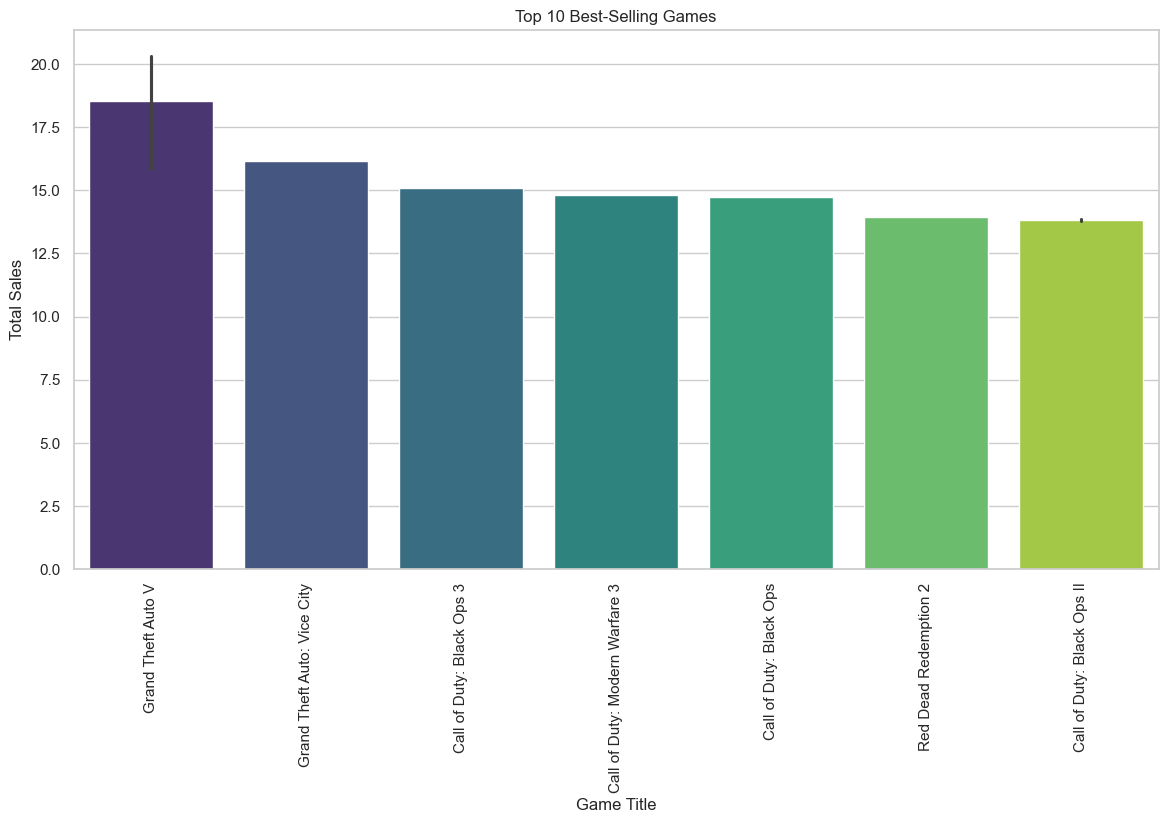

In [22]:
# 2. Identify the Top-Selling Games and Analyze Their Success Factors
# Top 10 best-selling games
top_games = df.nlargest(10, 'total_sales')

# Display top games
print(top_games[['title', 'total_sales', 'genre', 'console', 'release_date', 'publisher', 'developer']])

# Plot total sales of top 10 games
plt.figure(figsize=(14, 7))
sns.barplot(x='title', y='total_sales', data=top_games, palette='viridis')
plt.title('Top 10 Best-Selling Games')
plt.xlabel('Game Title')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()



C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\1298748467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=top_games, palette='viridis')


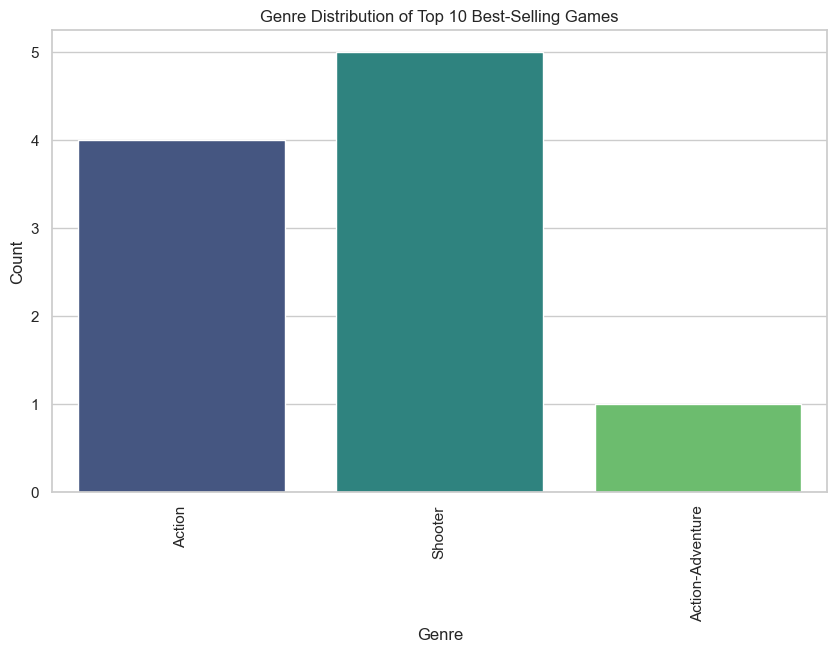

In [23]:
# Analyzing success factors for top 10 games
# Genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=top_games, palette='viridis')
plt.title('Genre Distribution of Top 10 Best-Selling Games')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\3266288319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='console', data=top_games, palette='viridis')


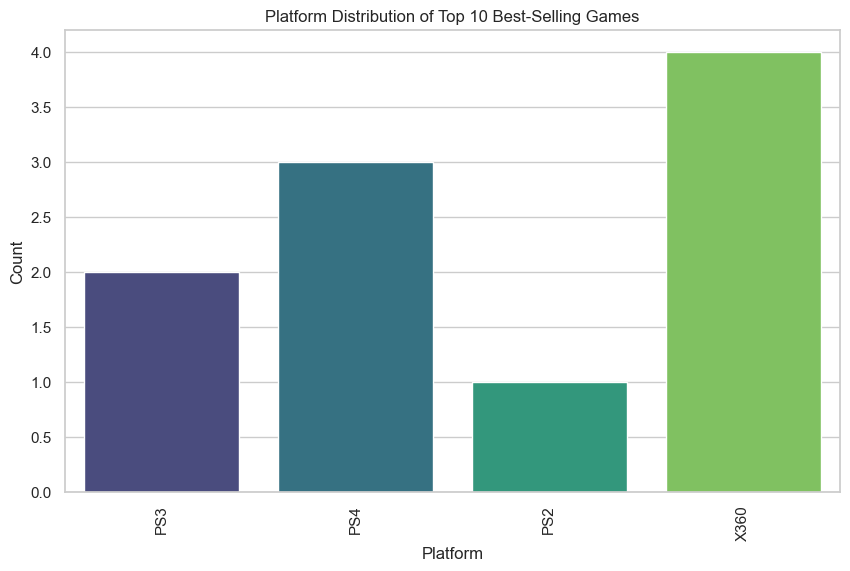

In [24]:
# Platform distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='console', data=top_games, palette='viridis')
plt.title('Platform Distribution of Top 10 Best-Selling Games')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\mryad\AppData\Local\Temp\ipykernel_21396\2940461059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_games['release_date'].dt.year, palette='viridis')


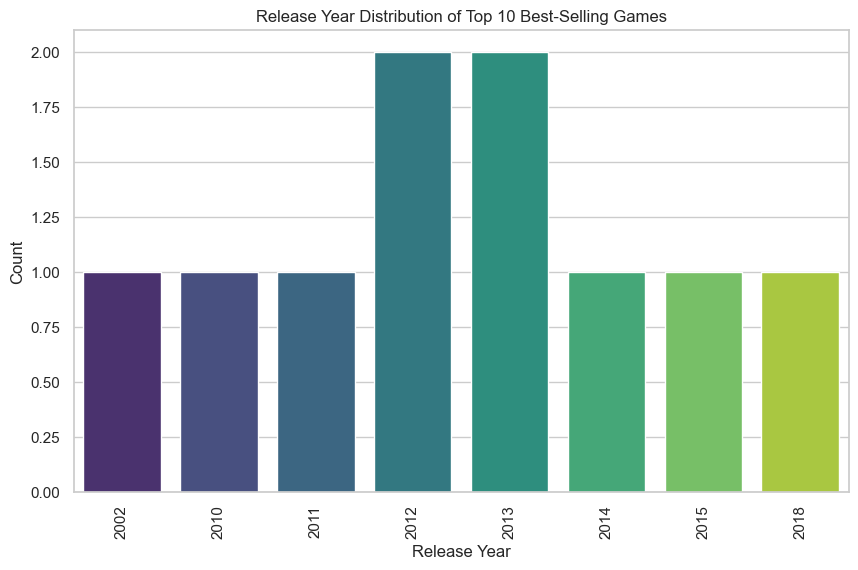

In [25]:
# Release year distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=top_games['release_date'].dt.year, palette='viridis')
plt.title('Release Year Distribution of Top 10 Best-Selling Games')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Aggregate sales data by year
df['year'] = df['release_date'].dt.year
annual_sales = df.groupby('year')['total_sales'].sum().reset_index()

# Prepare features and target variable
X = annual_sales[['year']]
y = annual_sales['total_sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and evaluate Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error for Random Forest Regressor: {mse}')


Mean Squared Error for Random Forest Regressor: 223.36624689000118


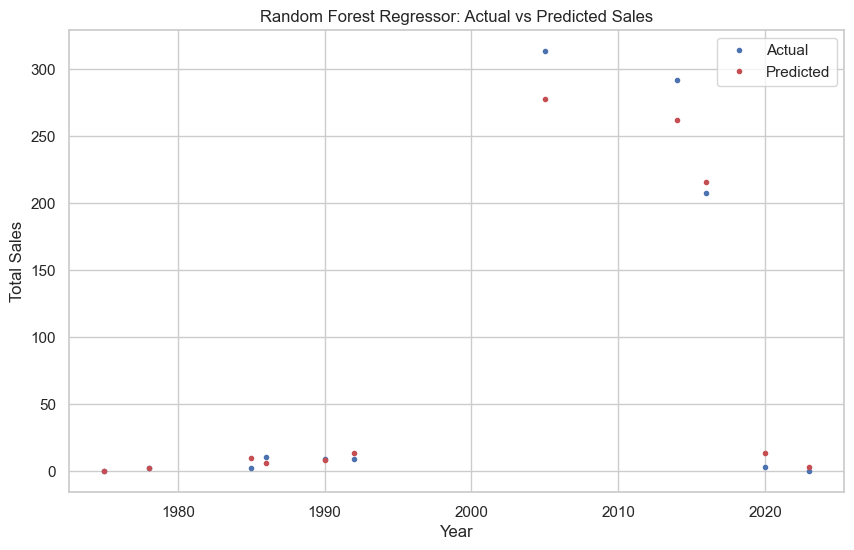

In [29]:
# Plot predictions vs actual sales
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, 'b.', label='Actual')
plt.plot(X_test, predictions, 'r.', label='Predicted')
plt.title('Random Forest Regressor: Actual vs Predicted Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

C:\Users\mryad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


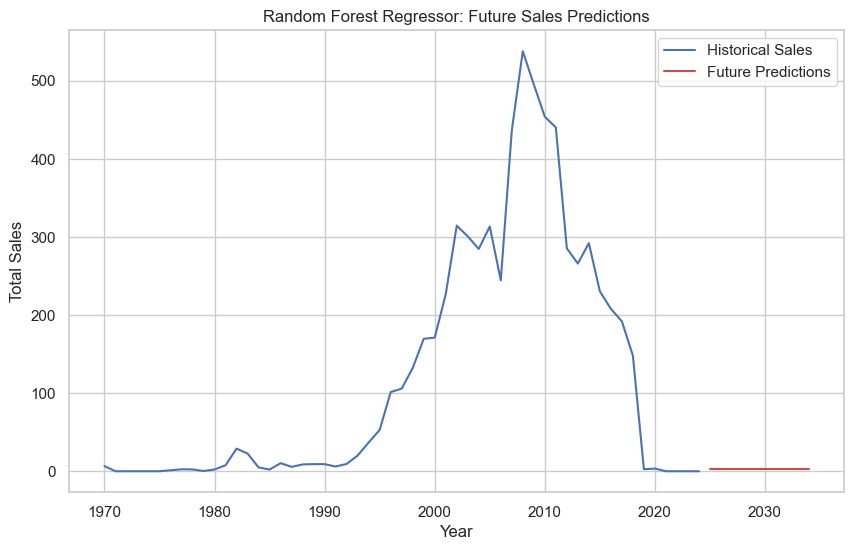

In [27]:
# Future prediction using Random Forest Regressor
future_years = np.arange(X['year'].max() + 1, X['year'].max() + 11).reshape(-1, 1)
future_predictions = rf_model.predict(future_years)

# Plot future predictions
plt.figure(figsize=(10, 6))
plt.plot(X['year'], y, 'b-', label='Historical Sales')
plt.plot(future_years, future_predictions, 'r-', label='Future Predictions')
plt.title('Random Forest Regressor: Future Sales Predictions')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()